## Data
The data used in this project is the American Sign Language(ASL) dataset. It is a complete natural language, that has same linguistic properties as spoken languages, with grammar that differs from English. ASL is expressed by movements of the hands and face.

The dataset format is patterned to match closely with the MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255.  

The dataset is taken from Kaggle: https://www.kaggle.com/datamunge/sign-language-mnist

## Objective 
Our objective here is to create a model using Convolution Neural Networks (CNNs) to correctly identify the hand gestures (sign language) with maximum accuracy.  
The project contains three models of different configurations having different accuracies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from sklearn.preprocessing import LabelBinarizer

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [5]:
train = pd.read_csv('C:/Users/DK/OneDrive/Desktop/Sign/New Folder/sign_mnist_train.csv')

In [6]:
test= pd.read_csv('C:/Users/DK/OneDrive/Desktop/Sign/New Folder/sign_mnist_test.csv')

In [7]:
X_train = train.drop('label', axis =1)
y_train = train['label']

In [8]:
X_test = test.drop('label', axis =1)
y_test = test['label']

##### Converting y lables of training data into one hot encodings.

In [11]:
binarizer = LabelBinarizer()

In [13]:
y_train = binarizer.fit_transform(y_train)
y_test = binarizer.fit_transform(y_test)

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28,28,1)

In [40]:
X_train.shape

(27455, 28, 28, 1)

### Some Images

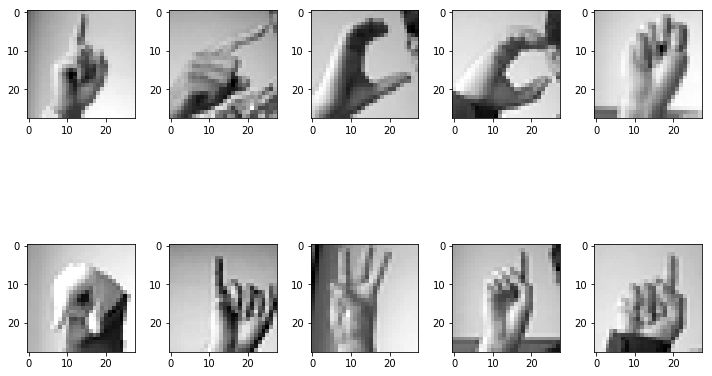

In [17]:
f, axes = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        axes[i,j].imshow(X_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()    


### Model1

In [24]:
optimzer = RMSprop(lr = 0.0001, rho = 0.9)

In [30]:
model = Sequential()

model.add(Conv2D(filters = 50, kernel_size = (3,3), padding = 'Same',
                 activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 25, kernel_size = (3,3), padding = 'Same',
                 activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(400, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(120, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(24, activation='softmax'))

model.compile(optimizer = optimzer, loss = 'categorical_crossentropy', metrics = ['accuracy'])          

In [31]:
model.fit(x= X_train, y = y_train,
          validation_data = (X_test, y_test),
          batch_size = 256, epochs = 20)

Train on 27455 samples, validate on 7172 samples
Epoch 1/20
27455/27455 [==============================] - 556s 20ms/step - loss: 2.7179 - acc: 0.2170 - val_loss: 3.1667 - val_acc: 0.0466
Epoch 2/20
27455/27455 [==============================] - 553s 20ms/step - loss: 1.5923 - acc: 0.5084 - val_loss: 3.0113 - val_acc: 0.0891
Epoch 3/20
27455/27455 [==============================] - 562s 20ms/step - loss: 1.0021 - acc: 0.6837 - val_loss: 2.3257 - val_acc: 0.3758
Epoch 4/20
27455/27455 [==============================] - 680s 25ms/step - loss: 0.6643 - acc: 0.7862 - val_loss: 1.4092 - val_acc: 0.6834
Epoch 5/20
27455/27455 [==============================] - 730s 27ms/step - loss: 0.4711 - acc: 0.8468 - val_loss: 0.6976 - val_acc: 0.8458
Epoch 6/20
27455/27455 [==============================] - 742s 27ms/step - loss: 0.3360 - acc: 0.8943 - val_loss: 0.3849 - val_acc: 0.9080
Epoch 7/20
27455/27455 [==============================] - 581s 21ms/step - loss: 0.2519 - acc: 0.9195 - val_loss: 0.2

In [33]:
predictions = model.predict_classes(X_test)

##### Classification report and confusion matrix needs both labels & predictions as single-digits, not as one-hot encoded vectors, that's why we have to convert y_test values from one-hot encoded to single digit values.

In [129]:
y_rounded_labels = np.argmax(y_test, axis = 1)

In [88]:
classes_model_1 = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y_rounded_labels, predictions, target_names = classes_model_1))

              precision    recall  f1-score   support

     Class 0       0.95      1.00      0.97       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       0.92      1.00      0.96       245
     Class 4       0.96      1.00      0.98       498
     Class 5       1.00      1.00      1.00       247
     Class 6       0.86      1.00      0.93       348
     Class 7       0.99      0.94      0.96       436
     Class 8       0.91      0.98      0.95       288
    Class 10       1.00      0.93      0.96       331
    Class 11       0.91      1.00      0.95       209
    Class 12       1.00      0.90      0.95       394
    Class 13       0.92      0.79      0.85       291
    Class 14       1.00      0.99      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       0.99      1.00      0.99       164
    Class 17       0.99      0.72      0.83       144
    Class 18       0.84    

In [85]:
cm_model_1 = confusion_matrix(y_rounded_labels ,predictions)

In [86]:
cm_model_1= pd.DataFrame(cm_model_1 , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

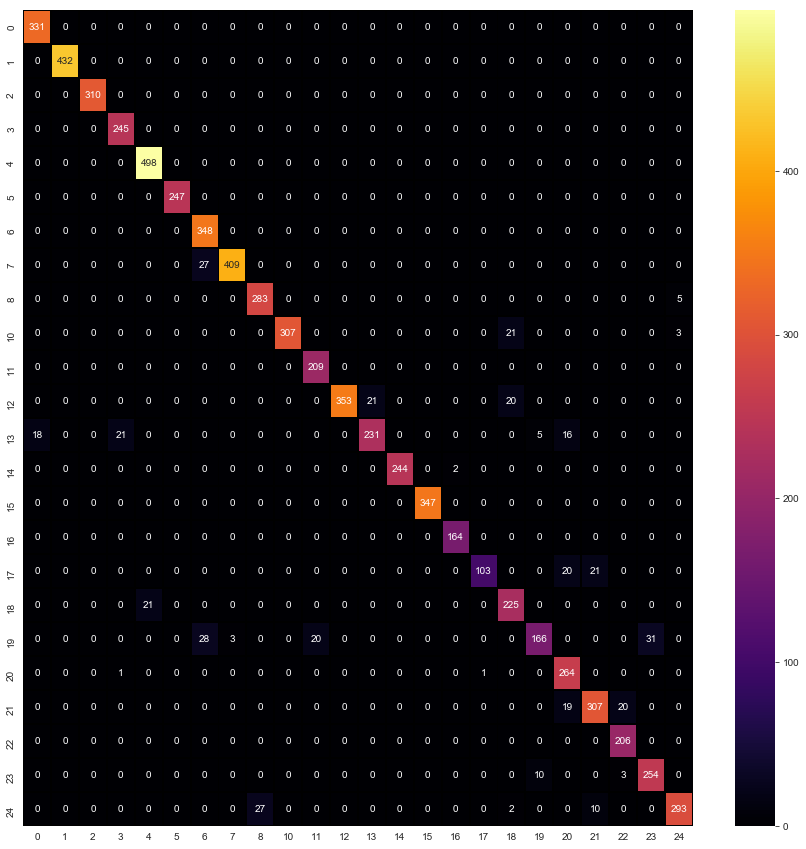

In [112]:
plt.figure(figsize = (15,15))
sns.heatmap(cm_model_1,cmap= "inferno", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [117]:
accuracy = model.evaluate(X_test, y_test)[1] * 100
accuracy

7172/7172 [==============================] - 38s 5ms/step


97.86670384829894

In [37]:
losses = pd.DataFrame(model.history.history)

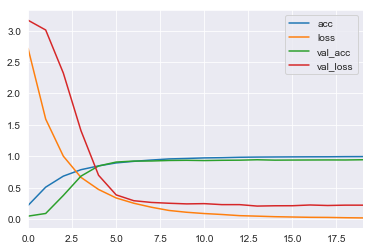

In [38]:
sns.set_style('darkgrid')
losses.plot()

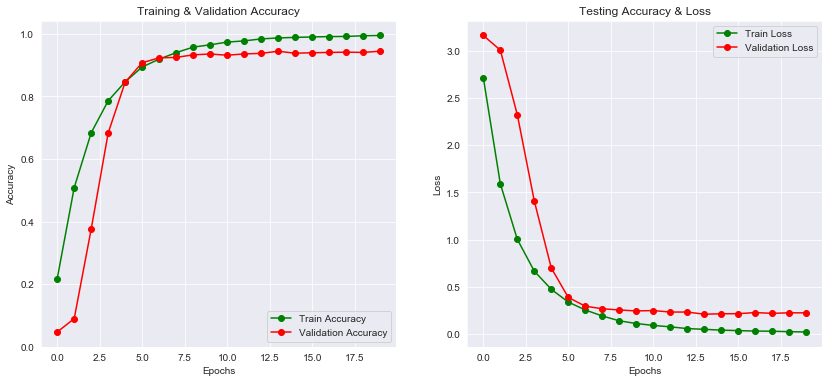

In [39]:
epochs = [i for i in range(20)]
fig, ax = plt.subplots(1,2)

ax[0].plot(epochs, model.history.history['acc'], 'go-', label = 'Train Accuracy')
ax[0].plot(epochs, model.history.history['val_acc'], 'ro-', label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, model.history.history['loss'], 'go-', label = 'Train Loss')
ax[1].plot(epochs, model.history.history['val_loss'], 'ro-', label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

fig.set_size_inches(14,6)

### Data Augmentation

In [43]:
datagen = ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False,
                             samplewise_std_normalization=False, zca_whitening=False,
                             
                             rotation_range= 15, zoom_range = 0.15, width_shift_range = 0.15, height_shift_range = 0.15,
                             horizontal_flip=False,  vertical_flip=False)
datagen.fit(X_train)

In [44]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

### Model 2

In [58]:
model_2 = Sequential()

model_2.add(Conv2D(filters = 50, kernel_size = (3,3), padding = 'Same',
                 activation= 'relu',  input_shape = (28,28,1)))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size= (2,2), strides = (2,2)))
model_2.add(Dropout(0.2))

model_2.add(Conv2D(filters = 25, kernel_size = (3,3), padding = 'Same',
                 activation= 'relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model_2.add(Dropout(0.2))

model_2.add(Flatten())

model_2.add(Dense(512, activation = "relu"))
model_2.add(Dropout(0.2))

model_2.add(Dense(256, activation = "relu"))
model_2.add(Dropout(0.2))

model_2.add(Dense(24, activation='softmax'))

model_2.compile(optimizer = optimzer, loss = 'categorical_crossentropy', metrics = ['accuracy'])          

In [60]:
history_2 = model_2.fit_generator(datagen.flow(X_train, y_train, batch_size = 256), epochs = 20, 
                    validation_data = (X_test, y_test))

Epoch 1/20
108/108 [==============================] - 669s 6s/step - loss: 3.1218 - acc: 0.1226 - val_loss: 3.1595 - val_acc: 0.0353
Epoch 2/20
108/108 [==============================] - 829s 8s/step - loss: 2.5822 - acc: 0.2267 - val_loss: 3.1153 - val_acc: 0.0615
Epoch 3/20
108/108 [==============================] - 786s 7s/step - loss: 2.2823 - acc: 0.3026 - val_loss: 2.8555 - val_acc: 0.1552
Epoch 4/20
108/108 [==============================] - 647s 6s/step - loss: 2.0377 - acc: 0.3666 - val_loss: 2.2133 - val_acc: 0.3253
Epoch 5/20
108/108 [==============================] - 553s 5s/step - loss: 1.8163 - acc: 0.4253 - val_loss: 1.4146 - val_acc: 0.6088
Epoch 6/20
108/108 [==============================] - 554s 5s/step - loss: 1.6170 - acc: 0.4788 - val_loss: 0.9962 - val_acc: 0.7324
Epoch 7/20
108/108 [==============================] - 552s 5s/step - loss: 1.4635 - acc: 0.5241 - val_loss: 0.8192 - val_acc: 0.7724
Epoch 8/20
108/108 [==============================] - 557s 5s/step - 

In [76]:
predictions_2 = model_2.predict_classes(X_test)

In [66]:
accuracy_2 = model_2.evaluate(X_test, y_test)[1] * 100

7172/7172 [==============================] - 35s 5ms/step


In [67]:
accuracy_2

95.46848856664808

In [64]:
loss_2 = pd.DataFrame(model_2.history.history)

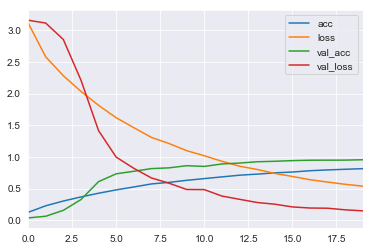

In [68]:
loss_2.plot()

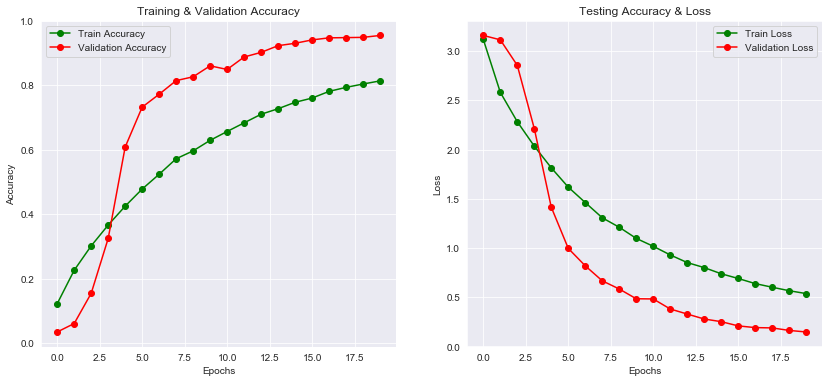

In [114]:
epochs = [i for i in range(20)]
fig, ax = plt.subplots(1,2)

ax[0].plot(epochs, model_2.history.history['acc'], 'go-', label = 'Train Accuracy')
ax[0].plot(epochs, model_2.history.history['val_acc'], 'ro-', label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, model_2.history.history['loss'], 'go-', label = 'Train Loss')
ax[1].plot(epochs, model_2.history.history['val_loss'], 'ro-', label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

fig.set_size_inches(14,6)

In [89]:
classes_model_2 = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y_rounded_labels, predictions_2, target_names = classes_model_2))

              precision    recall  f1-score   support

     Class 0       0.95      1.00      0.97       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       0.99      0.92      0.95       245
     Class 4       0.92      1.00      0.96       498
     Class 5       0.99      1.00      1.00       247
     Class 6       0.93      0.99      0.96       348
     Class 7       1.00      0.94      0.97       436
     Class 8       0.96      1.00      0.98       288
    Class 10       1.00      0.97      0.99       331
    Class 11       0.88      1.00      0.94       209
    Class 12       1.00      0.89      0.94       394
    Class 13       0.87      1.00      0.93       291
    Class 14       1.00      0.99      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       0.97      1.00      0.98       144
    Class 18       1.00    

In [90]:
cm_model_2 = confusion_matrix(y_rounded_labels ,predictions_2)

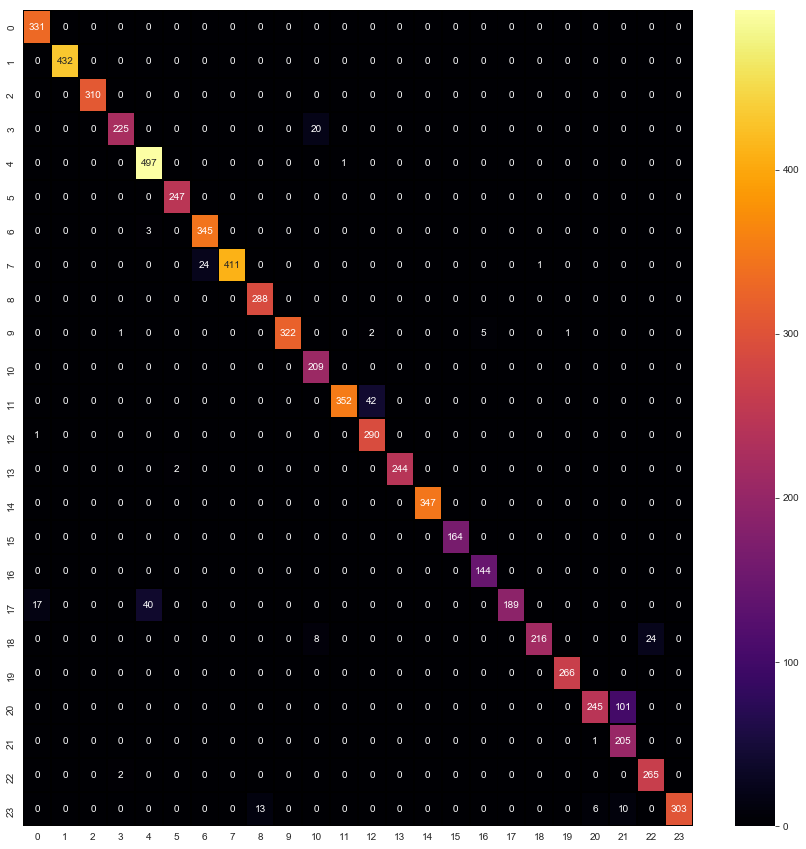

In [111]:
plt.figure(figsize = (15,15))
sns.heatmap(cm_model_2,cmap= "inferno", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

### Model 3
The model is a convolutional neural network with first layer of 75 convolution filters of size 3x3, followed by batch normalization and then max pooling with a pool size of 2x2 with strides of 2. Second layer has 50 convolution filters of size 3x3, followed by batch normalization and then max pooling with a pool size of 2x2 with strides of 2. Third layer has 25 convolution filters of size 3x3, followed by batch normalization and then max pooling with a pool size of 2x2 with strides of 2. After this the outputs are flattened and is fully connected to 512 neourons, which is further fully connected to 256 and then to 24 neurons. The 24 neurons are the 24 classes that we want to predict, the last layer uses softmax as activation function.

In [62]:
model_3 = Sequential()

model_3.add(Conv2D(filters = 75, kernel_size = (3,3),strides= 1, padding = 'Same',
                 activation= 'relu',  input_shape = (28,28,1)))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D(pool_size= (2,2), strides = (2,2)))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(filters = 50, kernel_size = (3,3), strides= 1, padding = 'Same',
                 activation= 'relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D(pool_size= (2,2), strides = (2,2)))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(filters = 25, kernel_size = (3,3), strides= 1, padding = 'Same',
                 activation= 'relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model_3.add(Dropout(0.2))

model_3.add(Flatten())

model_3.add(Dense(512, activation = "relu"))
model_3.add(Dropout(0.2))

model_3.add(Dense(256, activation = "relu"))
model_3.add(Dropout(0.2))

model_3.add(Dense(24, activation='softmax'))

model_3.compile(optimizer = optimzer, loss = 'categorical_crossentropy', metrics = ['accuracy'])          

In [63]:
history_3 = model_3.fit_generator(datagen.flow(X_train, y_train, batch_size = 128), epochs = 25, 
                    validation_data = (X_test, y_test))

Epoch 1/25
215/215 [==============================] - 948s 4s/step - loss: 3.0387 - acc: 0.1213 - val_loss: 3.2457 - val_acc: 0.0307
Epoch 2/25
215/215 [==============================] - 923s 4s/step - loss: 2.4820 - acc: 0.2417 - val_loss: 2.7217 - val_acc: 0.1801
Epoch 3/25
215/215 [==============================] - 928s 4s/step - loss: 2.0495 - acc: 0.3454 - val_loss: 1.4679 - val_acc: 0.5468
Epoch 4/25
215/215 [==============================] - 929s 4s/step - loss: 1.7269 - acc: 0.4334 - val_loss: 1.2645 - val_acc: 0.5498
Epoch 5/25
215/215 [==============================] - 928s 4s/step - loss: 1.4894 - acc: 0.5018 - val_loss: 0.8303 - val_acc: 0.7213
Epoch 6/25
215/215 [==============================] - 951s 4s/step - loss: 1.3375 - acc: 0.5459 - val_loss: 0.7633 - val_acc: 0.7407
Epoch 7/25
215/215 [==============================] - 954s 4s/step - loss: 1.1782 - acc: 0.5957 - val_loss: 0.5554 - val_acc: 0.8162
Epoch 8/25
215/215 [==============================] - 1029s 5s/step -

In [95]:
predictions_3 = model_3.predict_classes(X_test)

In [70]:
accuracy_3 = model_3.evaluate(X_test, y_test)[1] * 100
accuracy_3

7172/7172 [==============================] - 55s 8ms/step


99.42833240379252

In [71]:
loss_3 = pd.DataFrame(model_3.history.history)

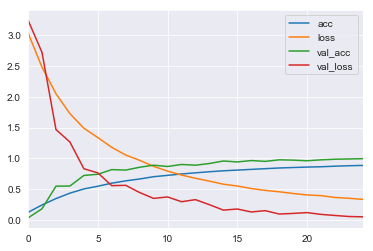

In [72]:
loss_3.plot()

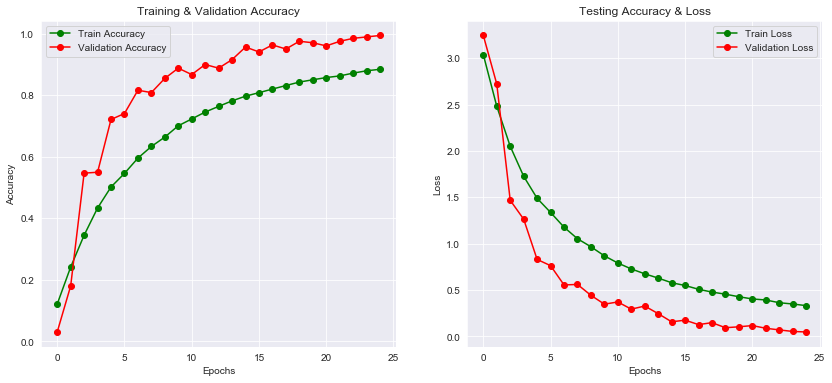

In [116]:
epochs = [i for i in range(25)]
fig, ax = plt.subplots(1,2)

ax[0].plot(epochs, model_3.history.history['acc'], 'go-', label = 'Train Accuracy')
ax[0].plot(epochs, model_3.history.history['val_acc'], 'ro-', label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, model_3.history.history['loss'], 'go-', label = 'Train Loss')
ax[1].plot(epochs, model_3.history.history['val_loss'], 'ro-', label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

fig.set_size_inches(14,6)

In [96]:
classes_model_3 = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y_rounded_labels, predictions_3, target_names = classes_model_3))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       0.99      1.00      1.00       310
     Class 3       1.00      1.00      1.00       245
     Class 4       1.00      0.98      0.99       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      1.00      1.00       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
    Class 10       1.00      0.98      0.99       331
    Class 11       1.00      1.00      1.00       209
    Class 12       0.98      0.97      0.98       394
    Class 13       0.96      1.00      0.98       291
    Class 14       1.00      0.99      0.99       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       0.95      0.97      0.96       144
    Class 18       0.98    

In [97]:
cm_model_3 = confusion_matrix(y_rounded_labels, predictions_3)

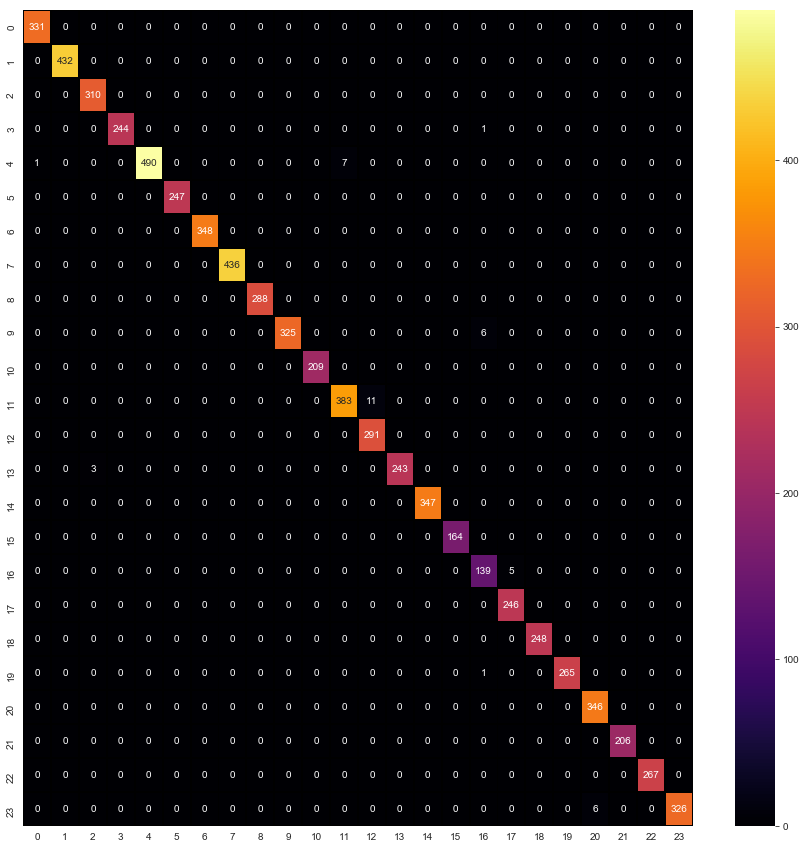

In [113]:
plt.figure(figsize = (15,15))
sns.heatmap(cm_model_3,cmap= "inferno", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [126]:
data = {'Model': ['Model 1', 'Model 2', 'Model 3'], 'Accuracy' : [accuracy, accuracy_2, accuracy_3]}

In [127]:
Accuracies = pd.DataFrame(data)

In [128]:
Accuracies

,Accuracy,Model
0,97.866704,Model 1
1,95.468489,Model 2
2,99.428332,Model 3
